In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, roc_auc_score

In [ ]:
data_url = "https://hbiostat.org/data/repo/diabetes.csv"
df = pd.read_csv(data_url)

In [52]:
df.head

<bound method NDFrame.head of         id   chol  stab.glu   hdl  ratio      glyhb    location  age  gender  \
0     1000  203.0        82  56.0    3.6   4.310000  Buckingham   46  female   
1     1001  165.0        97  24.0    6.9   4.440000  Buckingham   29  female   
2     1002  228.0        92  37.0    6.2   4.640000  Buckingham   58  female   
3     1003   78.0        93  12.0    6.5   4.630000  Buckingham   67    male   
4     1005  249.0        90  28.0    8.9   7.720000  Buckingham   64    male   
..     ...    ...       ...   ...    ...        ...         ...  ...     ...   
398  41506  296.0       369  46.0    6.4  16.110001      Louisa   53    male   
399  41507  284.0        89  54.0    5.3   4.390000      Louisa   51  female   
400  41510  194.0       269  38.0    5.1  13.630000      Louisa   29  female   
401  41752  199.0        76  52.0    3.8   4.490000      Louisa   41  female   
402  41756  159.0        88  79.0    2.0        NaN      Louisa   68  female   

     heig

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB
None


In [54]:
print(df.describe())

                 id        chol    stab.glu         hdl       ratio  \
count    403.000000  402.000000  403.000000  402.000000  402.000000   
mean   15978.310174  207.845771  106.672457   50.445274    4.521642   
std    11881.122124   44.445557   53.076655   17.262626    1.727886   
min     1000.000000   78.000000   48.000000   12.000000    1.500000   
25%     4792.500000  179.000000   81.000000   38.000000    3.200000   
50%    15766.000000  204.000000   89.000000   46.000000    4.200000   
75%    20336.000000  230.000000  106.000000   59.000000    5.400000   
max    41756.000000  443.000000  385.000000  120.000000   19.299999   

            glyhb         age      height      weight       bp.1s       bp.1d  \
count  390.000000  403.000000  398.000000  402.000000  398.000000  398.000000   
mean     5.589769   46.851117   66.020101  177.592040  136.904523   83.321608   
std      2.242595   16.312333    3.918515   40.340666   22.741033   13.589227   
min      2.680000   19.000000   52.0

In [55]:
df.duplicated().max()

False

In [56]:
print(df.isnull().sum())

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


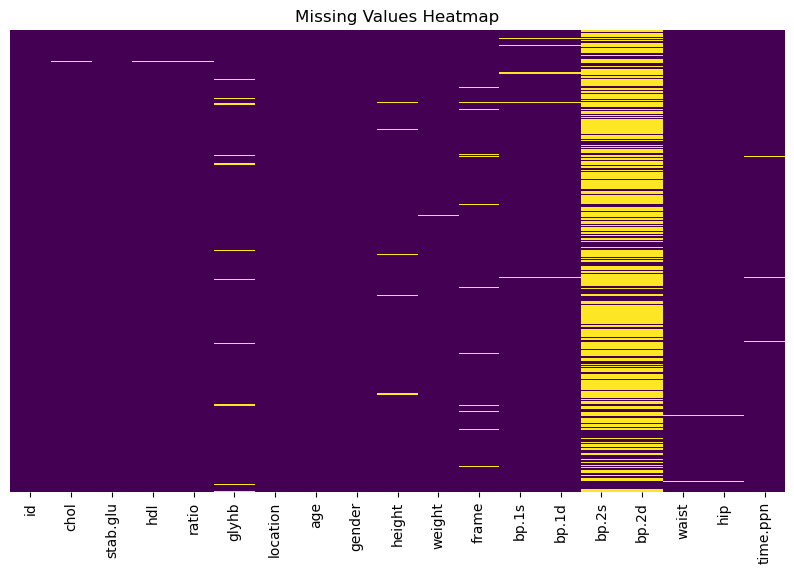

In [57]:
#draw missing value heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [58]:
# Step 1: Display the columun names in list form
print("Current columns:", df.columns.tolist())

# Step 2: Calculate missing values percentage by divinding the sum of missing value divided by total number of rows 
missing_percent = (df.isnull().sum() / len(df)) * 100

# Step 3: Identify the top 2 columns with the highest missing values display them as a list and store them in cols_to_drop
cols_to_drop = missing_percent.nlargest(2).index.tolist()
print("Columns to drop (highest missing values):", cols_to_drop)

# Step 4: We Drop the columns with highest missing values
df = df.drop(columns=cols_to_drop)

# Step 5: We print the remaing columns as to see if they are deleted
print("\nColumns after dropping:\n", df.columns.tolist())

Current columns: ['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age', 'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn']
Columns to drop (highest missing values): ['bp.2s', 'bp.2d']

Columns after dropping:
 ['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age', 'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn']


In [59]:
print(df.isnull().sum())

id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb       13
location     0
age          0
gender       0
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
dtype: int64


In [60]:
#store the mising values
missing_values = df.isnull().sum()
#calculate the missing values percentage and store it there
missing_percentage = (missing_values / len(df)) * 100
#create a data frame contaning two colums missing values and there percentage to eaily interprate
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
#print the missing values
print(missing_data[missing_data['Missing Values'] > 0])


          Missing Values  Percentage
chol                   1    0.248139
hdl                    1    0.248139
ratio                  1    0.248139
glyhb                 13    3.225806
height                 5    1.240695
weight                 1    0.248139
frame                 12    2.977667
bp.1s                  5    1.240695
bp.1d                  5    1.240695
waist                  2    0.496278
hip                    2    0.496278
time.ppn               3    0.744417


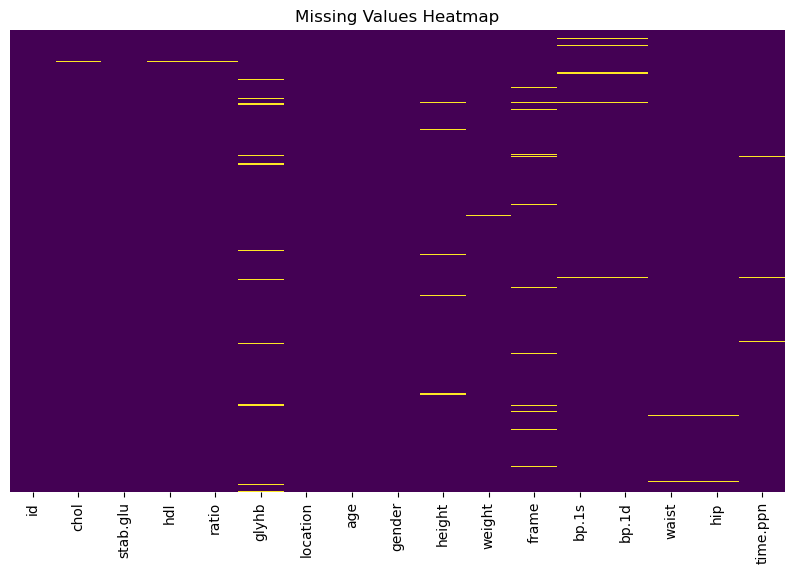

In [61]:
#draw missing value heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


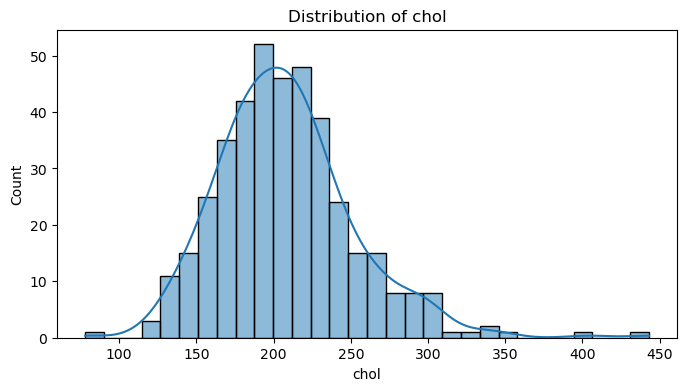

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


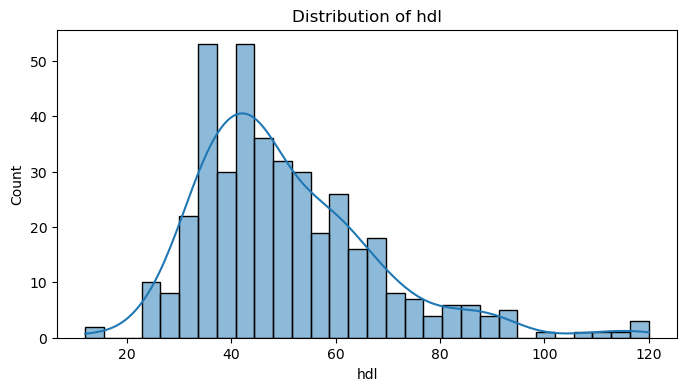

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


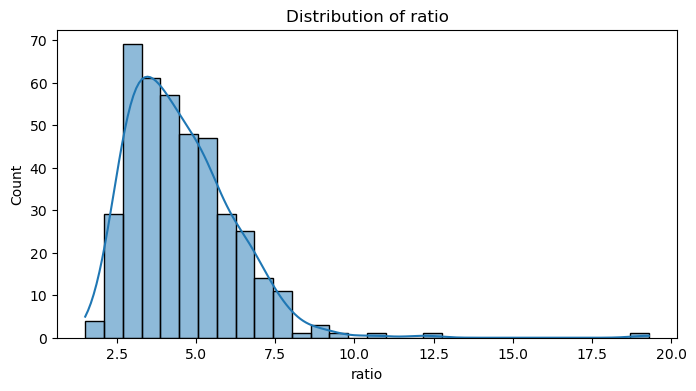

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


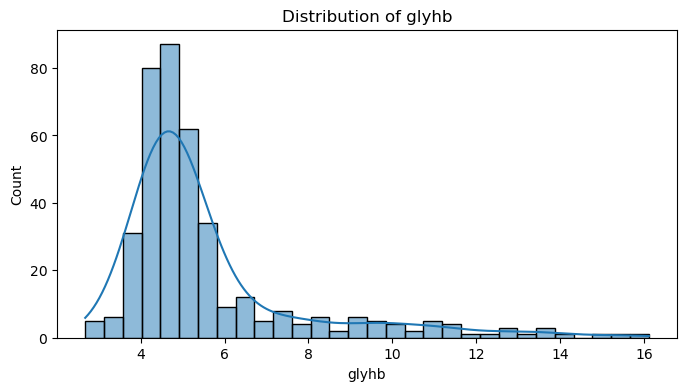

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


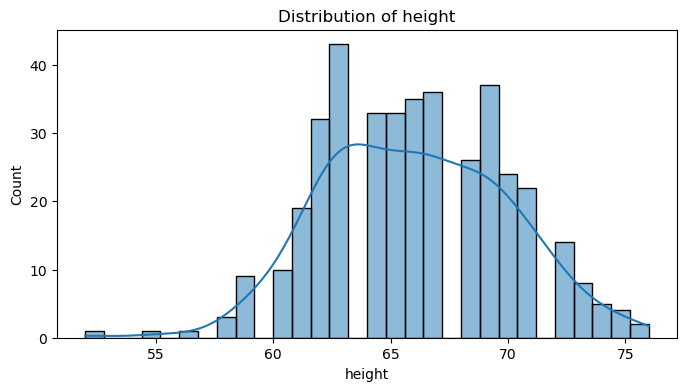

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


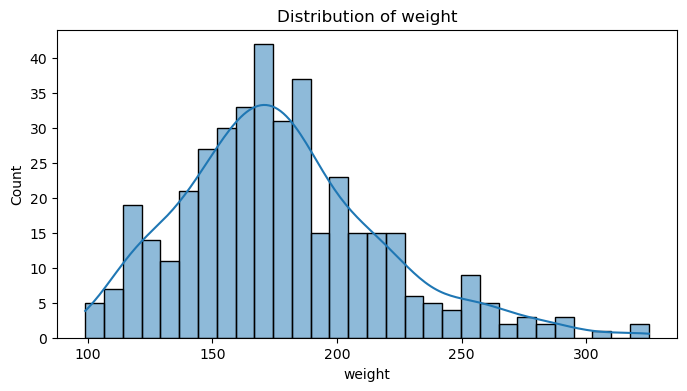

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


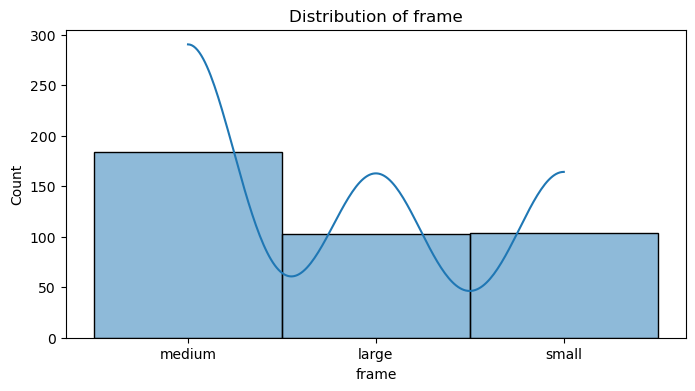

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


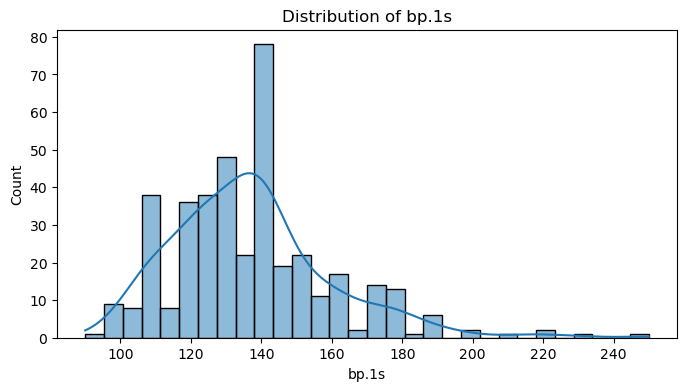

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


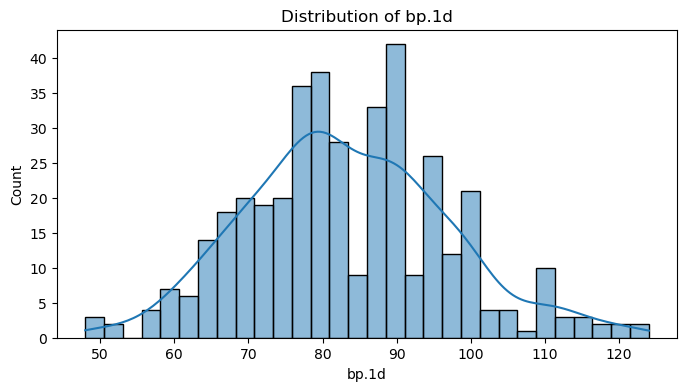

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


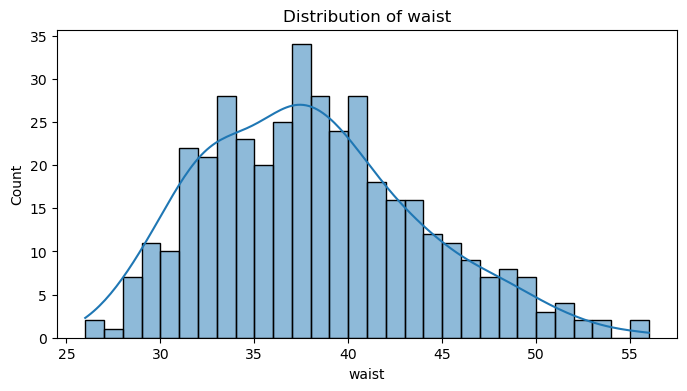

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


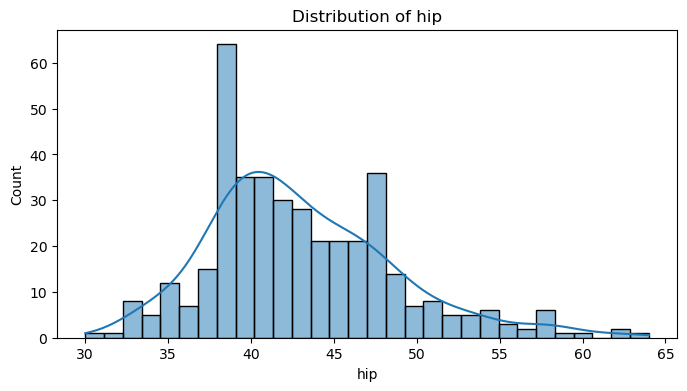

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


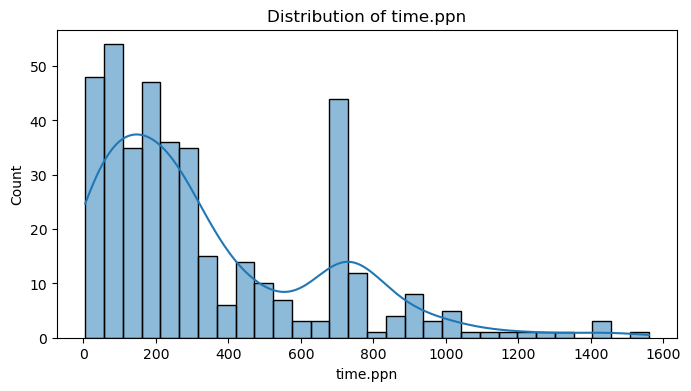

In [8]:
#find thw colums with missing values
num_cols_with_na = df.columns[df.isnull().any()].tolist()
#Plot a historgram and iterte over each column to plot the histogram
for col in num_cols_with_na:
    #plot a figure with width 8 and length 4
    plt.figure(figsize=(8, 4))
    #plot the distribution using Kernel Density Estimation (KDE) beacuse It shows the underlying distribution shape more smoothly and makes it easy...
    #to detect skewness, normality, or outliers in the data.
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [62]:
num_cols_with_null = df.columns[df.isnull().sum() > 0]
#We extracted null coloumns that are numeric columuns(int and float) because skewness is for nu,erical data
num_cols_with_null = df[num_cols_with_null].select_dtypes(include=[np.number]).columns

# Calculates skewness for each numerical column that contains missing values.
skew_values = df[num_cols_with_null].skew()

# Print results
print(f"Skewness of Numerical Features with Missing Values{skew_values}")
print(skew_values)

# Identify skewed columns (threshold = 0.5)
threshold = 0.5
skewed_cols = skew_values[abs(skew_values) > threshold].index

print("\nHighly Skewed Columns:")
print(skewed_cols)

Skewness of Numerical Features with Missing Valueschol        0.930048
hdl         1.196666
ratio       2.212431
glyhb       2.246125
height      0.028040
weight      0.726112
bp.1s       1.110359
bp.1d       0.272454
waist       0.471359
hip         0.803650
time.ppn    1.212838
dtype: float64
chol        0.930048
hdl         1.196666
ratio       2.212431
glyhb       2.246125
height      0.028040
weight      0.726112
bp.1s       1.110359
bp.1d       0.272454
waist       0.471359
hip         0.803650
time.ppn    1.212838
dtype: float64

Highly Skewed Columns:
Index(['chol', 'hdl', 'ratio', 'glyhb', 'weight', 'bp.1s', 'hip', 'time.ppn'], dtype='object')


In [63]:
#Creates a dictionary fill_dict that stores the mean or median the check if the colum is in the skewed list so if it is skewed..
#It is very sensetive so we use the median if it is not we use the mean
fill_dict = {
    col: df[col].median() if col in skewed_cols else df[col].mean()
    for col in num_cols_with_null
}

di_cleaned=df.fillna(fill_dict, inplace=True)

# Verify missing values are handled
print(f"Missing values after imputation:, {df[num_cols_with_null].isnull().sum()}")



Missing values after imputation:, chol        0
hdl         0
ratio       0
glyhb       0
height      0
weight      0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64


In [64]:
#Creates a dictionary fill_dict that stores the mean or median the check if the colum is in the skewed list so if it is skewed..
#It is very sensetive so we use the median if it is not we use the mean
fill_dict = {
    col: df[col].median() if col in skewed_cols else df[col].mean()
    for col in num_cols_with_null
}

di_cleaned=df.fillna(fill_dict, inplace=True)

# Verify missing values are handled
print(f"Missing values after imputation:, {df[num_cols_with_null].isnull().sum()}")



Missing values after imputation:, chol        0
hdl         0
ratio       0
glyhb       0
height      0
weight      0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64


In [65]:
#replace the missing values for the catgorical with mode
categorical_cols = df.select_dtypes(exclude=['number']).columns
missing_cat_values = df[categorical_cols].isnull().sum()
missing_cat_values = missing_cat_values[missing_cat_values > 0]

# Step 2: Fill missing values with mode
for col in missing_cat_values.index:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 3: Validate
print("Missing values after imputation:\n", df[categorical_cols].isnull().sum())


Missing values after imputation:
 location    0
gender      0
frame       0
dtype: int64


In [66]:
print(df.isnull().sum())

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64


In [67]:
X = df.drop(columns=['glyhb'])  # Features (all columns except 'glyhb')
y = df['glyhb']                 # Target variable (glyhb)

# Verify separation
print("Features (X) Preview:")
print(X.head()) 

print("\nTarget (y) Preview:")
print(y.head())

# Check number of rows and column in each data frame
print(f"Features: {X.shape}")  
print(f"Target: {y.shape}")    

Features (X) Preview:
     id   chol  stab.glu   hdl  ratio    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0   29.0  38.0     720.0  
1   218.0   large  112.0   68.0   46.0  48.0     360.0  
2   256.0   large  190.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0   44.0  41.0     300.0  

Target (y) Preview:
0    4.31
1    4.44
2    4.64
3    4.63
4    7.72
Name: glyhb, dtype: float64
Features: (403, 16)
Target: (403,)


In [68]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print split details
# Print sizes of the splits
print(f"Training data: {len(X_train)} samples, {X_train.shape[1]} features")
print(f"Test data: {len(X_test)} samples, {X_test.shape[1]} features")
print(f"Training target: {len(y_train)} samples")
print(f"Test target: {len(y_test)} samples")

Training data: 322 samples, 16 features
Test data: 81 samples, 16 features
Training target: 322 samples
Test target: 81 samples


In [69]:
features_con = ['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'height', 'bp.1s', 'bp.1d', 'time.ppn', 'weight', 'waist', 'hip']
features_cat = ['gender', 'location', 'frame']
target = 'glyhb'

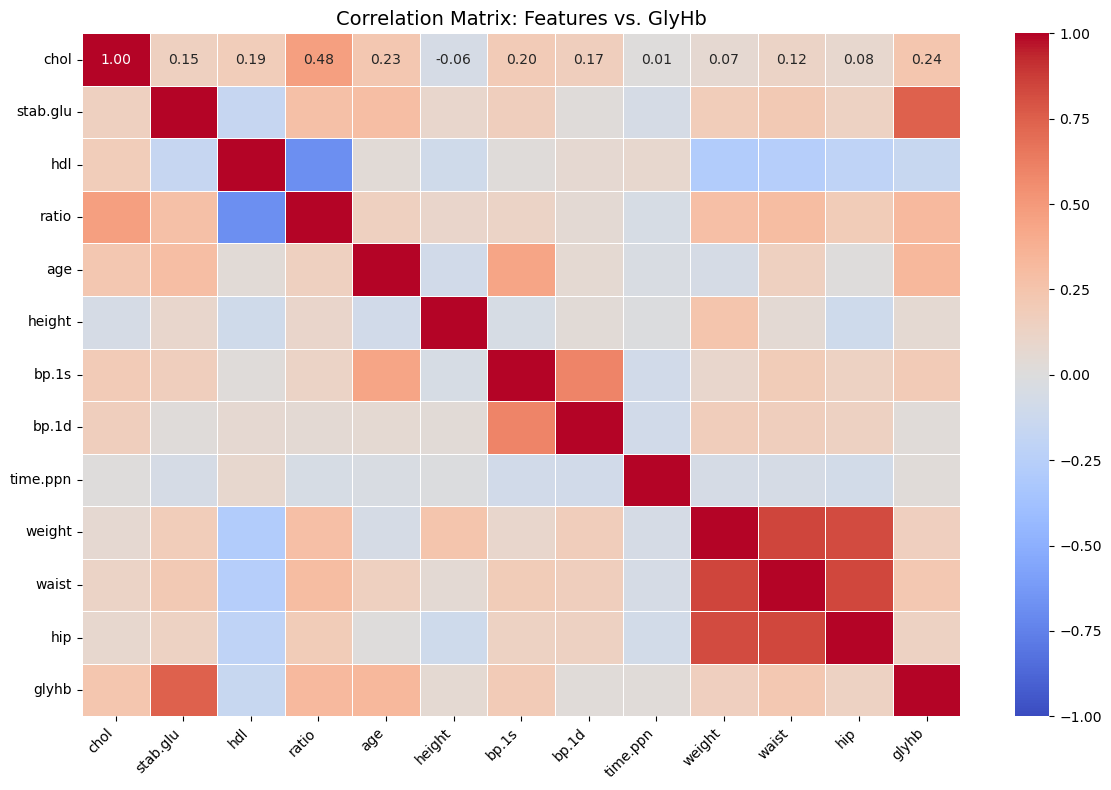

In [70]:
corr_matrix = df[features_con + [target]].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix: Features vs. GlyHb", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.tight_layout()
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Define the transformations
features = ['stab.glu', 'ratio', 'age' ]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features),  # Scale numerical features
    ])

In [72]:
selected_features = ['stab.glu', 'ratio', 'age']

In [73]:
from sklearn.model_selection import train_test_split

X = df[selected_features]  # Features
y = df['glyhb']            # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert transformed data to DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

# Print transformed data preview
print("Transformed Training Data:")
print(X_train_transformed.head())

print("\nTransformed Test Data:")
print(X_test_transformed.head())

Transformed Training Data:
   num__stab.glu  num__ratio  num__age
0       0.068852   -1.150443 -0.131971
1       0.972959   -0.688832 -0.994183
2      -0.717328   -0.515728 -0.994183
3      -0.501129   -0.458027 -0.994183
4       0.009888   -0.804235 -1.671635

Transformed Test Data:
   num__stab.glu  num__ratio  num__age
0      -0.245620   -1.265846  0.483894
1      -0.029421    0.638299 -0.378317
2      -0.343893    0.638299 -0.193558
3      -0.481474   -0.515728 -1.548461
4      -0.560092   -1.208145 -1.178942


In [75]:
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)

LinearRegression()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = linear_model.predict(X_test_transformed)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 0.82
MSE: 1.31
R²: 0.74


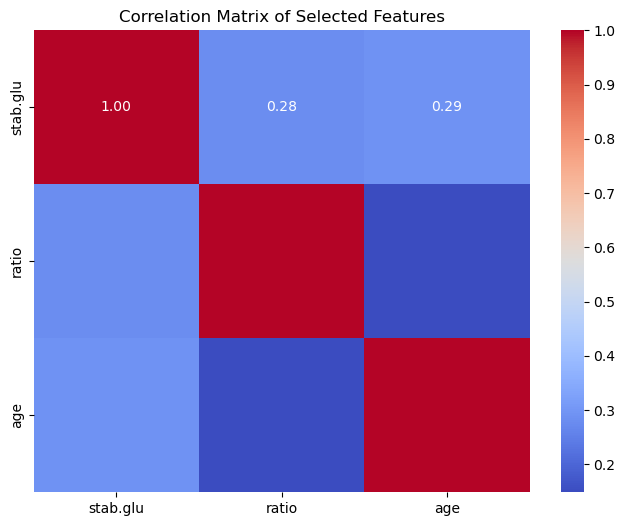

In [77]:
# Calculate correlation matrix for selected features
corr_selected = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select features for multicollinearity check
features = ['stab.glu', 'ratio', 'age']
X = df[features]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["VIF"]

0    5.685354
1    6.316601
2    6.680858
Name: VIF, dtype: float64

In [132]:
#classification

In [133]:
threshold_value = 6.5 #clincally proved threshold
df['diabetes'] = (df['glyhb'] > threshold_value).astype(int)

In [134]:
df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetes
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,1
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,1
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0,0


In [84]:
# Define features and target
X = df.drop(columns=['glyhb', 'diabetes'])  # Exclude GlyHb and target
y = df['diabetes']  # Target: Diabetes (0 or 1)

In [135]:
print("Features (X) Preview:")
print(x.head()) 

print("\nTarget (y) Preview:")
print(y.head())

# Check number of rows and column in each data frame
print(f"Features: {X.shape}")  
print(f"Target: {y.shape}")   

Features (X) Preview:
     id   chol  stab.glu   hdl  ratio    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0   29.0  38.0     720.0  
1   218.0   large  112.0   68.0   46.0  48.0     360.0  
2   256.0   large  190.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0   44.0  41.0     300.0  

Target (y) Preview:
0    0
1    0
2    0
3    0
4    1
Name: diabetes, dtype: int32
Features: (403, 3)
Target: (403,)


In [136]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print split details
# Print sizes of the splits
print(f"Training data: {len(x_train)} samples, {x_train.shape[1]} features")
print(f"Test data: {len(x_test)} samples, {x_test.shape[1]} features")
print(f"Training target: {len(Y_train)} samples")
print(f"Test target: {len(Y_test)} samples")

Training data: 322 samples, 16 features
Test data: 81 samples, 16 features
Training target: 322 samples
Test target: 81 samples


In [142]:
# Step 4: Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict on test set
y_pred_log_reg = log_model.predict(X_test_scaled)

In [143]:
# Evaluate model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.75      0.86        12

    accuracy                           0.96        81
   macro avg       0.98      0.88      0.92        81
weighted avg       0.96      0.96      0.96        81



In [144]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.251339
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  322
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.4380
Time:                        11:51:29   Log-Likelihood:                -80.931
converged:                       True   LL-Null:                       -144.00
Covariance Type:            nonrobust   LLR p-value:                 3.665e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9011      1.030     -7.674      0.000      -9.919      -5.883
stab.glu       0.0341      0.

Optimization terminated successfully.
         Current function value: 0.224383
         Iterations 8


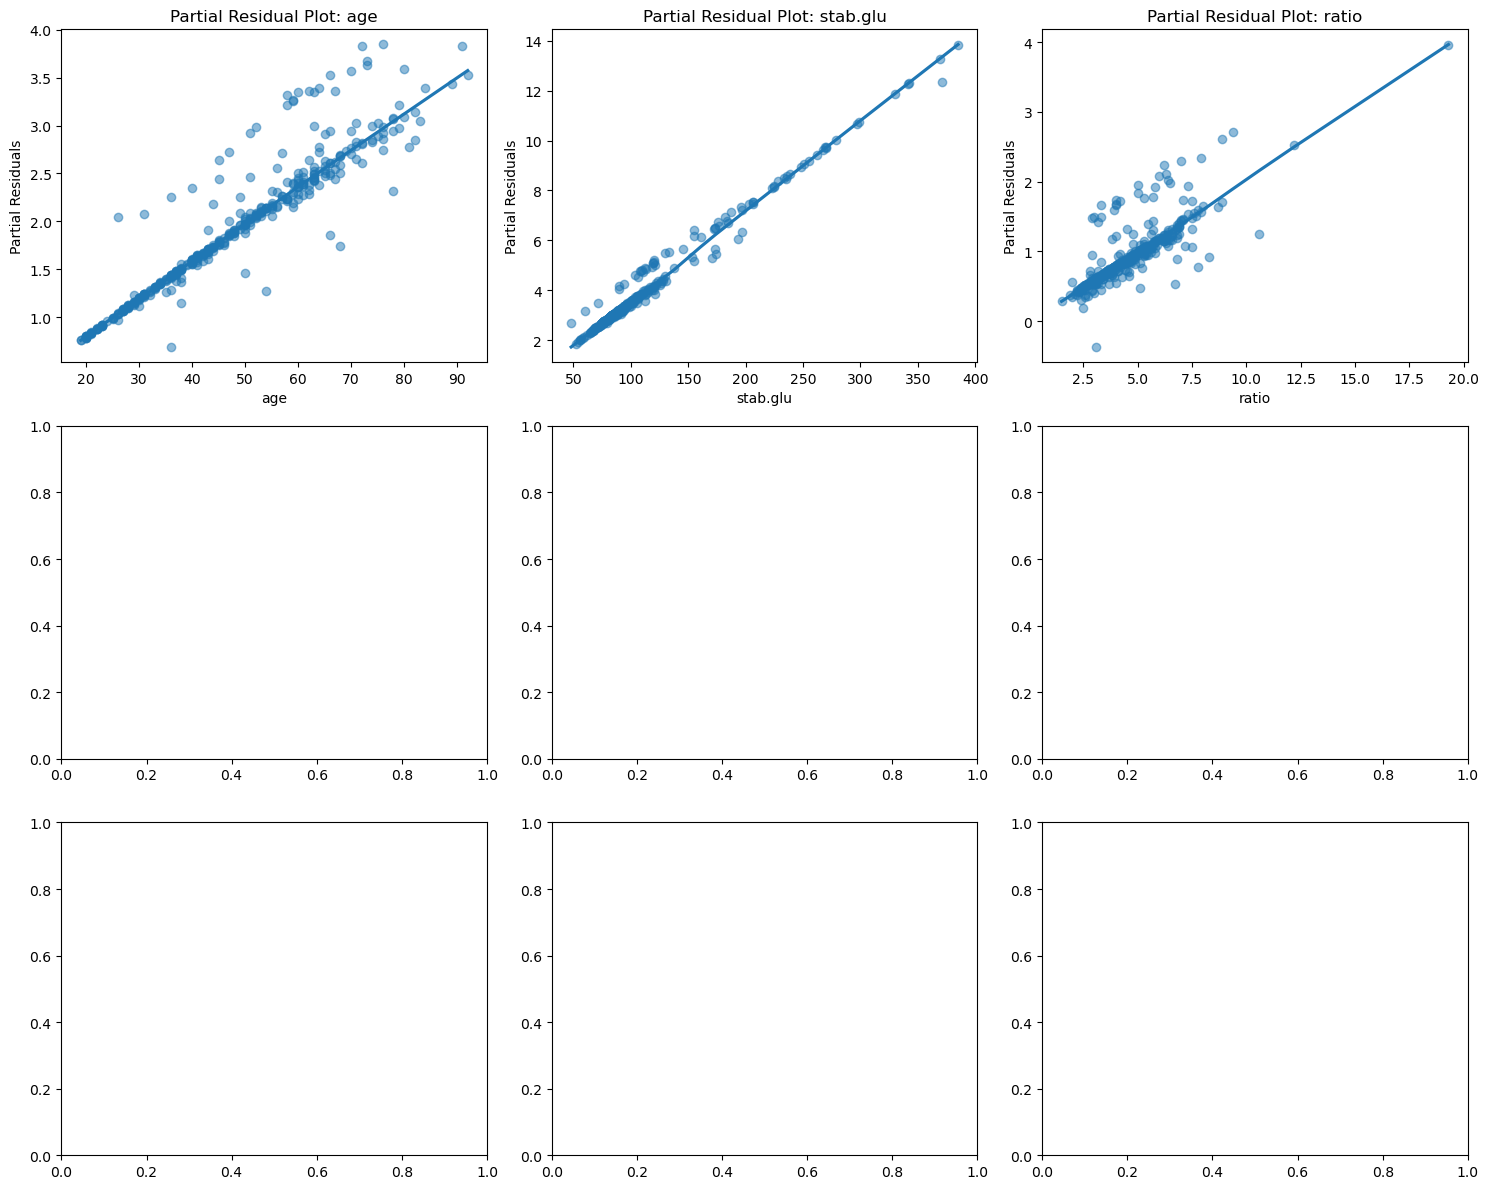

In [153]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your features 'X' and target 'y'

# Add constant for intercept
X_const = sm.add_constant(X)  # Adding constant to X for intercept in the logistic regression model

# Fit logistic regression model
logit_model = sm.Logit(y, X_const).fit()

# Get predicted log-odds (predicted probabilities)
log_odds = logit_model.predict(X_const)

# List of continuous variables to plot partial residuals
continuous_vars = ["age", "stab.glu", "ratio"]

# Create a subplot grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust grid based on the number of features
axes = axes.flatten()  # Flatten to use index-based access

# Loop through the features to plot partial residuals
for i, col in enumerate(continuous_vars):  # Loop through continuous variables
    # Compute the partial residuals for the feature
    partial_residuals = y - log_odds + X_const[col] * logit_model.params[col]
    
    # Plot partial residuals for each feature
    sns.regplot(x=X_const[col], y=partial_residuals, ax=axes[i], lowess=True, scatter_kws={"alpha": 0.5})
    axes[i].set_title(f"Partial Residual Plot: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Partial Residuals")

plt.tight_layout()
plt.show()


In [154]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)

    Feature       VIF
0  stab.glu  1.164215
1     ratio  1.102526
2       age  1.093772


In [155]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.251339
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  322
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.4380
Time:                        11:55:51   Log-Likelihood:                -80.931
converged:                       True   LL-Null:                       -144.00
Covariance Type:            nonrobust   LLR p-value:                 3.665e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9011      1.030     -7.674      0.000      -9.919      -5.883
stab.glu       0.0341      0.

In [156]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic
dw_stat = durbin_watson(log_reg.resid_response)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 2.004764552643442


In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9629629629629629
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571


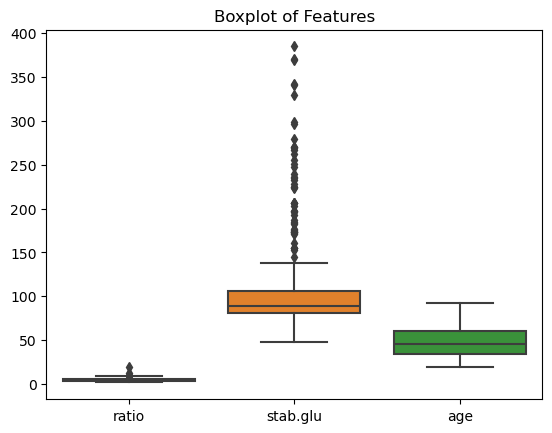

In [158]:
###### plt.figure(figsize=(12, 6))
sns.boxplot(data=X[["ratio", "stab.glu",'age']])
plt.title("Boxplot of Features")
plt.show()